In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df_count = pd.read_csv("results/hochuli/mnist_count.csv")
df_count

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
0,1,1,2.082440,0.955112,0.643556,18.278880,216,1056384000
1,1,2,0.771469,0.667807,0.747611,13.620369,227,1056384000
2,1,3,0.635509,0.583786,0.781278,14.524727,208,1056384000
3,1,4,0.557641,0.517742,0.807056,13.966707,285,1056384000
4,1,5,0.503777,0.478838,0.817889,16.196326,270,1056384000
...,...,...,...,...,...,...,...,...
250,5,47,0.176162,0.271508,0.908944,18.167139,18329,1056384000
251,5,48,0.172685,0.273159,0.905778,17.967504,337,1056384000
252,5,49,0.170368,0.264529,0.909611,13.663888,546,1056384000
253,5,50,0.166118,0.260499,0.908667,13.655350,8910,1056384000


In [39]:
df_original = pd.read_csv("results/hochuli/mnist_original.csv")
df_original

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
0,1,1,2.080660,0.967964,0.609500,13.617301,0,0
1,1,2,0.780601,0.683426,0.746278,13.648082,0,0
2,1,3,0.640909,0.588081,0.778667,12.728311,0,0
3,1,4,0.557806,0.503286,0.820333,12.524316,0,0
4,1,5,0.496821,0.472460,0.825667,13.476078,0,0
...,...,...,...,...,...,...,...,...
250,5,47,0.165597,0.271977,0.908778,12.382486,0,0
251,5,48,0.163047,0.283506,0.905833,13.514115,0,0
252,5,49,0.157992,0.273958,0.907444,13.648203,0,0
253,5,50,0.155646,0.266544,0.910389,13.605713,0,0


In [40]:
df_diff = pd.read_csv("results/hochuli/mnist_diff.csv")
df_diff

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
0,1,1,2.291081,2.208624,0.200333,13.638084,0,0
1,1,2,0.973426,0.698976,0.747944,13.819374,0,0
2,1,3,0.662879,0.592144,0.781778,13.619301,0,0
3,1,4,0.571938,0.519667,0.815000,12.951248,0,0
4,1,5,0.513331,0.485943,0.818889,13.771732,0,0
...,...,...,...,...,...,...,...,...
250,5,47,0.170469,0.284475,0.907278,12.505309,0,0
251,5,48,0.166006,0.274794,0.908667,13.786622,0,0
252,5,49,0.162390,0.278097,0.909611,13.843093,0,0
253,5,50,0.158728,0.278662,0.908000,12.537629,0,0


In [41]:
# splitting training and test
df_count_train = df_count[df_count["epoch"] != -1]
df_count_test = df_count[df_count["epoch"] == -1]
df_original_train = df_original[df_original["epoch"] != -1]
df_original_test = df_original[df_original["epoch"] == -1]
df_diff_train = df_diff[df_diff["epoch"] != -1]
df_diff_test = df_diff[df_diff["epoch"] == -1]

In [42]:
# add relu proportion
df_count_train["relu_proportion"] = df_count_train["zero_relu_call"] / df_count_train["total_relu_call"]
df_original_train["relu_proportion"] = df_original_train["zero_relu_call"] / df_original_train["total_relu_call"]
df_diff_train["relu_proportion"] = df_diff_train["zero_relu_call"] / df_diff_train["total_relu_call"]

/tmp/ipykernel_2683/561248041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_count_train["relu_proportion"] = df_count_train["zero_relu_call"] / df_count_train["total_relu_call"]
/tmp/ipykernel_2683/561248041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original_train["relu_proportion"] = df_original_train["zero_relu_call"] / df_original_train["total_relu_call"]
/tmp/ipykernel_2683/561248041.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

## Frequência da ReLU

Tamanho da rede: 122_570

In [43]:
temp = df_count_train.groupby("execution").sum()
relu_proportion = temp["zero_relu_call"] / temp["total_relu_call"]
print(f"Proporção Média da ReLU: {relu_proportion.mean()}    1/{round(1/relu_proportion.mean()):_}")

Proporção Média da ReLU: 3.3941521264994553e-06    1/294_624


[Text(0.5, 0, 'época'), Text(0, 0.5, "relu'(0) / relu'(x)")]

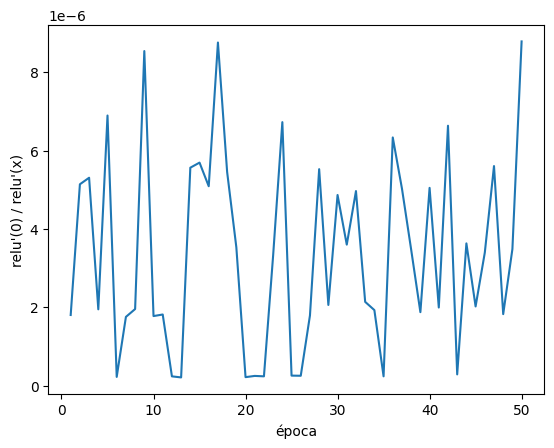

In [44]:
df_train_avg = df_count_train.groupby("epoch").mean()
ax = sns.lineplot(data=df_train_avg, x="epoch", y="relu_proportion")
ax.set(xlabel="época", ylabel="relu'(0) / relu'(x)")

## Eficiência do Modelo

In [45]:
print(f"Acurácia (teste) média: {round(100*df_count_test['val_acc'].mean(), 2)}%")

Acurácia (teste) média: 89.84%


<Axes: xlabel='epoch', ylabel='train_loss'>

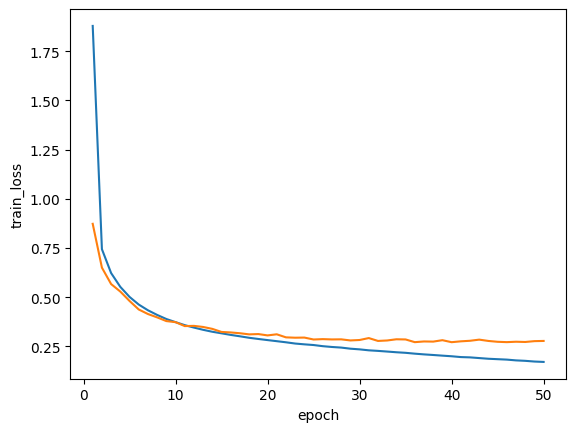

In [46]:
ax = sns.lineplot(data=df_train_avg, x="epoch", y="train_loss")
sns.lineplot(data=df_train_avg, x="epoch", y="val_loss", ax=ax)

In [47]:
df_train_sum = df_count_train.groupby("execution").sum()
seconds_avg = round(df_train_sum["time"].mean())
minutes_avg = seconds_avg // 60
seconds_avg = seconds_avg % 60
print(f"Tempo médio de treino: {minutes_avg}:{seconds_avg}")

Tempo médio de treino: 13:9


## Comparando com funções diferenciáveis

In [48]:
df_train_avg_diff = df_diff_train.groupby("epoch").mean()
df_train_avg_original = df_original_train.groupby("epoch").mean()

[Text(0.5, 0, 'época'), Text(0, 0.5, 'tempo (seg)')]

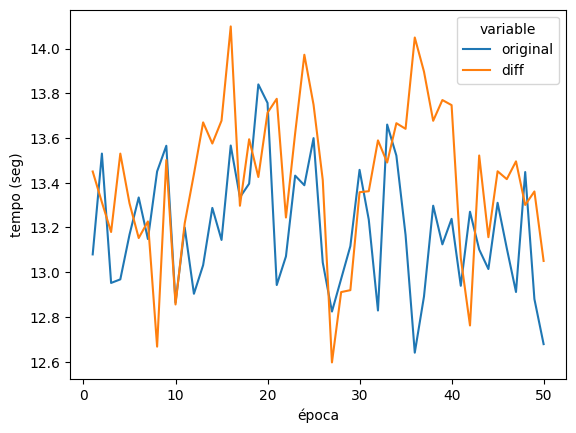

In [49]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["time"]
temp["diff"] = df_train_avg_diff["time"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
#ax.set_title("Tempo por Epoca")
ax.set(xlabel="época", ylabel="tempo (seg)")

In [50]:
# tempo total de treino
time_original = round(df_train_avg_original["time"].sum())
time_diff = round(df_train_avg_diff["time"].sum())

print(f"Tempo total de treino (não diff): {time_original//60:02}:{time_original%60:02}")
print(f"Tempo total de treino (diff): {time_diff//60:02}:{time_diff%60:02}")
print(f"Diferença: {round(100*(time_diff - time_original) / time_original, 2)}%")

Tempo total de treino (não diff): 11:00
Tempo total de treino (diff): 11:11
Diferença: 1.67%


Text(0.5, 1.0, 'Loss (Treino) por Epoca')

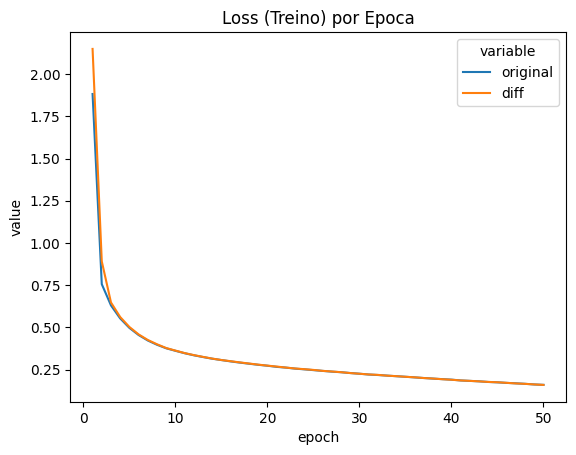

In [51]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["train_loss"]
temp["diff"] = df_train_avg_diff["train_loss"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
ax.set_title("Loss (Treino) por Epoca")

Text(0.5, 1.0, 'Loss (Validacao) por Epoca')

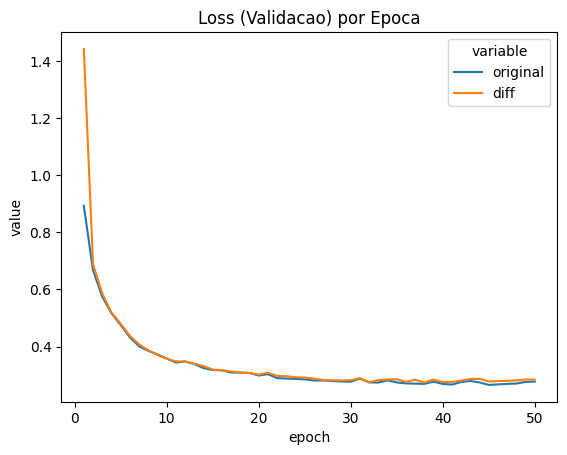

In [52]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["val_loss"]
temp["diff"] = df_train_avg_diff["val_loss"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
ax.set_title("Loss (Validacao) por Epoca")

Text(0.5, 1.0, 'Acurácia (Validacao) por Epoca')

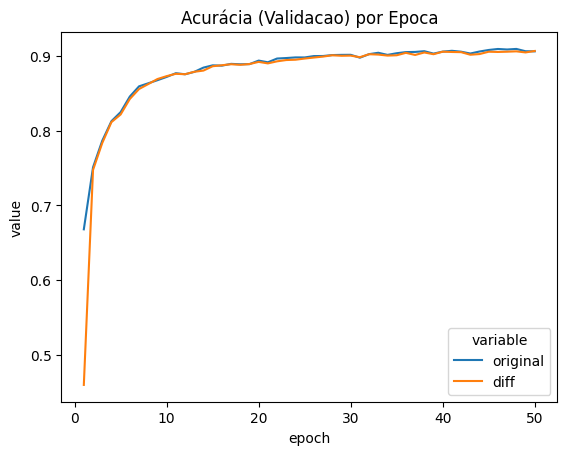

In [53]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["val_acc"]
temp["diff"] = df_train_avg_diff["val_acc"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
ax.set_title("Acurácia (Validacao) por Epoca")

In [56]:
# melhor época original
best_original = df_train_avg_original[df_train_avg_original["val_loss"] == df_train_avg_original["val_loss"].min()]
best_original

,execution,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call,relu_proportion
epoch,,,,,,,,
45,3.0,0.174259,0.265276,0.907844,13.310195,0.0,0.0,NaN


In [57]:
# melhor época diff
best_diff = df_train_avg_diff[df_train_avg_diff["val_loss"] == df_train_avg_diff["val_loss"].min()]
best_diff

,execution,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call,relu_proportion
epoch,,,,,,,,
38,3.0,0.196629,0.27372,0.904478,13.676869,0.0,0.0,NaN


In [20]:
# tempo para chegar na melhor época
epoch_original = df_train_avg_original[df_train_avg_original["val_loss"] == df_train_avg_original["val_loss"].min()].index[0]
epoch_diff = df_train_avg_diff[df_train_avg_diff["val_loss"] == df_train_avg_diff["val_loss"].min()].index[0]

time_original = round(df_train_avg_original.head(epoch_original)["time"].sum())
time_diff = round(df_train_avg_diff.head(epoch_diff)["time"].sum())

print(f"Tempo de treino até melhor época (não diff): {time_original//60:02}:{time_original%60:02}")
print(f"Tempo de treino até melhor época (diff): {time_diff//60:02}:{time_diff%60:02}")
print(f"Diferença: {round(100*(time_diff - time_original) / time_original, 2)}%")

Tempo de treino até melhor época (não diff): 09:55
Tempo de treino até melhor época (diff): 08:31
Diferença: -14.12%


## Avaliação nos dados de teste

In [21]:
df_diff_test

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
50,1,-1,NaN,0.327494,0.8942,1.688432,0,0
101,2,-1,NaN,0.304388,0.9028,1.672024,0,0
152,3,-1,NaN,0.318384,0.8980,1.696448,0,0
203,4,-1,NaN,0.317944,0.9000,1.647664,0,0
254,5,-1,NaN,0.303115,0.9018,1.654488,0,0


In [22]:
df_original_test

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
50,1,-1,NaN,0.308947,0.8996,1.653778,0,0
101,2,-1,NaN,0.287362,0.9025,1.638057,0,0
152,3,-1,NaN,0.309644,0.8936,1.646816,0,0
203,4,-1,NaN,0.299353,0.9006,1.646894,0,0
254,5,-1,NaN,0.295455,0.9010,1.646456,0,0


In [23]:
# prediction time
diff_time = df_diff_test["time"].mean()
original_time = df_original_test["time"].mean()
diff = (diff_time - original_time) / original_time
print(f"Tempo Diferenciáveis: {diff_time} seg")
print(f"Tempo Não-diferenciáveis: {original_time} seg")
print(f"Diferenciáveis são {round(100*diff, 2)}% mais lentas")

Tempo Diferenciáveis: 1.6718111515045166 seg
Tempo Não-diferenciáveis: 1.6464003086090089 seg
Diferenciáveis são 1.54% mais lentas


In [24]:
# loss
diff_loss = df_diff_test["val_loss"].mean()
original_loss = df_original_test["val_loss"].mean()
diff = (diff_loss - original_loss) / original_loss
print(f"Loss Diferenciáveis: {diff_loss}")
print(f"Loss Não-diferenciáveis: {original_loss}")
print(f"Diferenciáveis são {round(100*diff, 2)}% piores")

Loss Diferenciáveis: 0.3142647051811218
Loss Não-diferenciáveis: 0.30015240579843516
Diferenciáveis são 4.7% piores


In [25]:
# acc
diff_acc = df_diff_test["val_acc"].mean()
original_acc = df_original_test["val_acc"].mean()
diff = (diff_acc - original_acc) / original_acc
print(f"Acurácia Diferenciáveis: {diff_acc} seg")
print(f"Acurácia Não-diferenciáveis: {original_acc} seg")
if diff < 0:
    print(f"Acurácia das diferenciáveis é {-round(100*diff, 2)}% menor")
else:
    print(f"Acurácia das diferenciáveis é {round(100*diff, 2)}% maior")

Acurácia Diferenciáveis: 0.89936 seg
Acurácia Não-diferenciáveis: 0.8994599999999998 seg
Acurácia das diferenciáveis é 0.01% menor
